# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [233]:
# Import the required libraries and dependencies

import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline



In [234]:
# Load the environment variables from the .env file

load_dotenv()



True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [235]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc_coins = 1.2
eth_coins = 5.3



#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [236]:
# Set the monthly amount for the member's household income to 12000

monthly_income = 12000



#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [237]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"



#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [238]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent=4, sort_keys=True))



{
    "data": {
        "1": {
            "circulating_supply": 18851500,
            "id": 1,
            "last_updated": 1634952816,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1152267551875,
                    "percent_change_1h": 0.0866730829713496,
                    "percent_change_24h": -3.08619298800378,
                    "percent_change_7d": -1.16518850035857,
                    "percentage_change_1h": 0.0866730829713496,
                    "percentage_change_24h": -3.08619298800378,
                    "percentage_change_7d": -1.16518850035857,
                    "price": 61089.0,
                    "volume_24h": 39081135904
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18851500,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [239]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(eth_response, indent=4, sort_keys=True))



{
    "data": {
        "1027": {
            "circulating_supply": 118037885,
            "id": 1027,
            "last_updated": 1634952836,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 472387235985,
                    "percent_change_1h": 0.364733656878251,
                    "percent_change_24h": -3.38394241010771,
                    "percent_change_7d": 2.97671198175281,
                    "percentage_change_1h": 0.364733656878251,
                    "percentage_change_24h": -3.38394241010771,
                    "percentage_change_7d": 2.97671198175281,
                    "price": 4001.31,
                    "volume_24h": 20897112051
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 118037885,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurren

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [240]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]


# Print the current price of BTC

print(f"The price for BTC is ${btc_price}")



The price for BTC is $61089.0


In [241]:
# Navigate the BTC response object to access the current price of ETH

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]


# Print the current price of ETH

print(f"The price for ETH is ${eth_price}")



The price for ETH is $4001.31


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [242]:
# Compute the current value of the BTC holding 

btc_value = round(btc_price *btc_coins,2)


# Print current value of your holding in BTC

print(f"The current value of BTC holdings is ${btc_value}")



The current value of BTC holdings is $73306.8


In [243]:
# Compute the current value of the ETH holding 

eth_value = round(eth_price *eth_coins,2)


# Print current value of your holding in ETH

print(f"The current value of ETH holdings is ${eth_value}")



The current value of ETH holdings is $21206.94


In [244]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = round(btc_value + eth_value,2)


# Print current cryptocurrency wallet balance

print(f"The total value of the crypto wallet is ${total_crypto_wallet}")



The total value of the crypto wallet is $94513.74


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [245]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

spy_shares = 110
agg_shares = 200



#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [246]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
    


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [247]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ["SPY", "AGG"]


# Set timeframe to 1D 

timeframe = "1D"


# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp("2021-10-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-22", tz="America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [248]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df


# Review the first 5 rows of the Alpaca DataFrame

prices_df.head()



AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2021-10-22 00:00:00-04:00  113.97  114.1399  113.895  114.07  3309637  453.13   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-22 00:00:00-04:00  454.67  451.05  453.13  50771701

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [249]:
# Access the closing price for AGG from the Alpaca DataFrame

agg_close_price = float(prices_df["AGG"]["close"])


# Print the AGG closing price

agg_close_price



114.07

In [250]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price = float(prices_df["SPY"]["close"])


# Print the SPY closing price

spy_close_price



453.13

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [251]:
# Calculate the current value of the bond portion of the portfolio
# Convert to float type

agg_value = float(agg_close_price * agg_shares)


# Print the current value of the bond portfolio

agg_value



22814.0

In [252]:
# Calculate the current value of the stock portion of the portfolio
# Convert to float type

spy_value = float(spy_close_price * spy_shares)


# Print the current value of the stock portfolio

spy_value



49844.3

In [253]:
# Calculate the total value of the stock and bond portion of the portfolio

total_stocks_bonds = agg_value + spy_value


# Print the current balance of the stock and bond portion of the portfolio

total_stocks_bonds



72658.3

In [254]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

total_portfolio = total_crypto_wallet + total_stocks_bonds


# Print current cryptocurrency wallet balance

total_portfolio



167172.04

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [255]:
# Consolidate financial assets data into a Python list

savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data

savings_data

    

[94513.74, 72658.3]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [256]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame(
    savings_data,
    columns=[amount],  
    index=tickers,
    )


# Display the savings_df DataFrame

savings_df



,amount
SPY,94513.74
AGG,72658.30


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='amount'>], dtype=object)

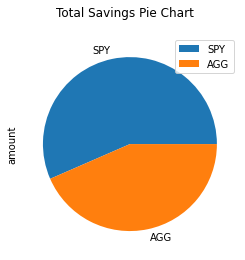

In [257]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

savings_df.plot.pie(
    subplots=True,
    title="Total Savings Pie Chart")



#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [258]:
# Create a variable named emergency_fund_value

emergency_fund_value = 3 * monthly_income



##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [259]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print("Congratulations! You have saved enough money for an emergency fund.")

elif total_portfolio == emergency_fund_value:
    print("Congratulations on saving three times your monthly income!")

elif total_portfolio < emergency_fund_value:
    print(f"You are ${emergency_fund_value - total_portfolio} away from reaching you goal!")



Congratulations! You have saved enough money for an emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [260]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

start_date = pd.Timestamp("2018-10-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-22", tz="America/New_York").isoformat()


# Set number of rows to 1000 to retrieve the maximum amount of rows

limit_rows = 1000


In [261]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

historical_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df


# Display both the first and last five rows of the DataFrame

display(historical_prices_df.head())
display(historical_prices_df.tail())



AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319  277.00   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760  270.94   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453  273.33   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207  267.37   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985  265.92   

                                                              
                             high     low   close     volume  
time                                                          
2018-10-22 00:00:00-04:00  277.36  274.41  275.06   64990700  
2018-10-23 00:00:00-04:00  274.87  268.61  273.54  113790534  
2018-10-24 00:00:00-04:00  273.76  264.70  265.22  130172487  
2018-10-25 00:00:00-04:00  271.81  266.23  270.14   97215770  
2018-10-26 00:00:00-04:00  271.00  262.29  265.29  161147868

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-10-18 00:00:00-04:00  114.33  114.5600  114.2500  114.49  5145953   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.1600  114.18  3999066   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07  5881766   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-10-18 00:00:00-04:00  443.97  447.550  443.27  447.22  51994387  
2021-10-19 00:00:00-04:00  448.92  450.700  448.27  450.68  40790864  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [262]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

MC_60_40_weight = MCSimulation(
    portfolio_data = historical_prices_df,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Review the simulation input data

MC_60_40_weight.portfolio_data.head()



AGG                                     \
                             open    high      low    close   volume   
time                                                                   
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-22 00:00:00-04:00          NaN  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   

                                                   
                              volume daily_return  
time                                               
2018-10-22 00:00:00-04:00   64990700          NaN  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551  
2018-10-26 00:00:00-04:00  161147868    -0.017954

In [263]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

MC_60_40_weight.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986149,1.005270,0.993782,0.993425,1.001205,0.995031,1.000960,1.017349,0.998220,0.998574,...,1.011794,0.992214,0.999309,1.002269,0.992536,0.995946,0.999768,0.999278,1.006869,1.001305
2,0.987443,0.998605,0.995110,0.994278,1.003065,0.995593,1.006319,1.019347,1.011458,0.999635,...,1.012685,0.995556,1.001775,1.013103,0.994993,1.003437,0.999590,1.002502,1.014630,0.999875
3,0.993381,1.006800,0.994990,0.997579,1.001675,0.987904,0.998919,1.032350,1.013811,1.007968,...,1.001546,0.992579,0.997190,1.004001,0.989662,0.999436,1.000293,1.004503,1.013285,1.009126
4,0.997205,1.002536,0.996128,0.999637,0.991249,0.990871,0.998645,1.038248,1.015003,0.996191,...,1.008032,0.981593,0.999942,1.002340,0.985497,1.000764,0.993508,0.993934,1.004608,1.009441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.142714,12.165837,7.059225,7.533942,18.089544,3.876662,31.258633,10.653291,7.438614,16.947782,...,20.951442,7.695660,18.523637,10.616566,16.218386,23.798526,10.805748,21.088589,16.293035,16.555991
7557,9.105796,12.311693,7.046508,7.535047,18.040253,3.852878,31.193035,10.585575,7.401576,16.744017,...,20.701431,7.676500,18.364853,10.586781,16.291965,23.860100,10.851375,20.924207,16.198553,16.488145
7558,9.114687,12.289777,7.026025,7.523060,17.944249,3.804423,31.029102,10.588463,7.405656,16.822722,...,20.841665,7.670707,18.520149,10.667830,16.155124,23.727957,10.760749,20.830621,16.270796,16.386581
7559,9.205457,12.337378,7.004578,7.571590,17.842380,3.823059,31.222462,10.613977,7.432746,16.772465,...,20.773844,7.679156,18.391144,10.762543,16.218366,23.608332,10.830514,20.837526,16.470504,16.571046


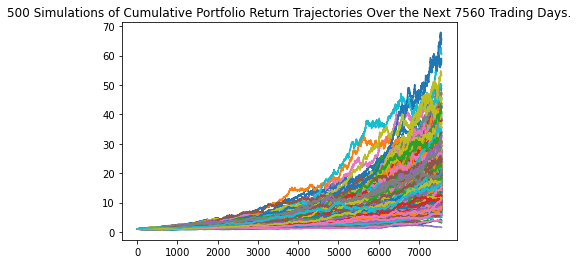

In [264]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

weight_60_40_line_plot = MC_60_40_weight.plot_simulation()



#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

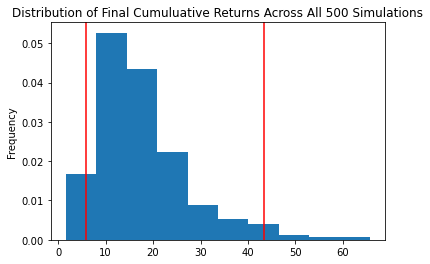

In [265]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

weight_60_40_bar_plot = MC_60_40_weight.plot_distribution()



#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [266]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

weight_60_40_table = MC_60_40_weight.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics

print(weight_60_40_table)



count           500.000000
mean             17.707036
std               9.737447
min               1.598035
25%              10.653514
50%              16.004827
75%              21.383400
max              65.749539
95% CI Lower      5.781747
95% CI Upper     43.419226
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [267]:
# Print the current balance of the stock and bond portion of the members portfolio

total_stocks_bonds



72658.3

In [268]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_thirty_cumulative_return = round(weight_60_40_table[8] * total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(weight_60_40_table[9] * total_stocks_bonds,2)


# Print the result of your calculations

print(f"There is a 95% chance that the stock and bond portfolio will end up within the range of ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return} in thirty years.")



There is a 95% chance that the stock and bond portfolio will end up within the range of $420091.88 and $3154767.18 in thirty years.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [269]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

MC_20_80_weight = MCSimulation(
    portfolio_data = historical_prices_df,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Review the simulation input data

MC_20_80_weight.portfolio_data.head()



AGG                                     \
                             open    high      low    close   volume   
time                                                                   
2018-10-22 00:00:00-04:00  104.47  104.52  104.340  104.350  2634319   
2018-10-23 00:00:00-04:00  104.67  104.74  104.475  104.485  3281760   
2018-10-24 00:00:00-04:00  104.69  104.81  104.670  104.760  4029453   
2018-10-25 00:00:00-04:00  104.71  104.77  104.610  104.665  3882207   
2018-10-26 00:00:00-04:00  104.88  105.05  104.870  104.915  4411985   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-22 00:00:00-04:00          NaN  277.00  277.36  274.41  275.06   
2018-10-23 00:00:00-04:00     0.001294  270.94  274.87  268.61  273.54   
2018-10-24 00:00:00-04:00     0.002632  273.33  273.76  264.70  265.22   
2018-10-25 00:00:00-04:00    -0.000907  267.37  271.81  266.23  270.14   
2018-10-26 00:00:00-04:00     0.002389  265.92  271.00  262.29  265.29   

                                                   
                              volume daily_return  
time                                               
2018-10-22 00:00:00-04:00   64990700          NaN  
2018-10-23 00:00:00-04:00  113790534    -0.005526  
2018-10-24 00:00:00-04:00  130172487    -0.030416  
2018-10-25 00:00:00-04:00   97215770     0.018551  
2018-10-26 00:00:00-04:00  161147868    -0.017954

In [270]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

MC_20_80_weight.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012205,0.992120,0.998020,0.979350,0.997764,0.991587,0.997281,1.017827,0.988440,1.008289,...,1.001705,1.000802,0.992569,1.026464,1.004485,0.981809,0.993169,1.009925,0.986945,1.010683
2,1.015917,0.994651,0.995059,1.000658,1.006977,0.972019,0.978589,0.991215,1.001222,1.003507,...,0.985703,0.996885,1.010242,1.038269,0.981897,0.990000,0.994140,1.015003,0.980490,1.005344
3,1.030618,1.005957,0.997804,0.998429,0.996631,0.965910,0.960397,0.995318,0.996094,1.008847,...,0.994630,1.006912,1.006508,1.019270,0.984711,0.988088,1.010200,1.007918,0.967485,1.010880
4,0.995930,0.998622,0.988130,0.996169,0.999100,0.958567,0.958781,0.988607,0.976161,1.015630,...,0.977236,1.026362,0.998583,1.008253,0.983194,0.984691,0.991992,1.015751,0.966994,1.024808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,10.259006,2.364628,3.039760,8.230384,2.085813,9.998055,1.915109,2.972874,15.609702,2.435944,...,5.798682,3.949903,2.229810,1.936598,4.833968,20.109524,2.496455,1.395524,5.946939,4.571063
2517,10.234798,2.378558,3.057414,8.090126,2.097649,9.903487,1.937772,3.023925,15.946900,2.430038,...,5.740402,3.971994,2.226757,1.915232,4.976868,19.997685,2.498487,1.382722,5.960590,4.664097
2518,10.281297,2.385363,2.991860,8.051890,2.085612,9.914301,1.926364,2.977730,16.105062,2.455172,...,5.887069,3.934427,2.259794,1.900907,4.993948,19.865285,2.474368,1.387324,5.911502,4.646890
2519,10.306644,2.373869,2.937030,7.986626,2.099567,9.910590,1.902358,3.009796,16.029209,2.417529,...,5.877280,3.940713,2.294005,1.916470,5.048266,20.064536,2.460801,1.359667,5.819798,4.714364


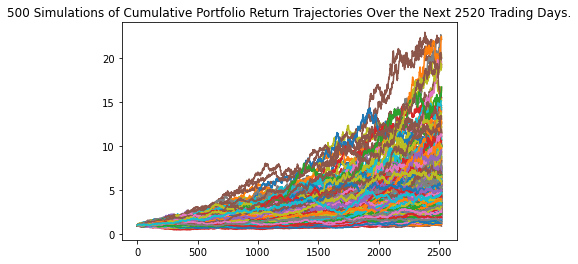

In [271]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

weight_20_80_line_plot = MC_20_80_weight.plot_simulation()



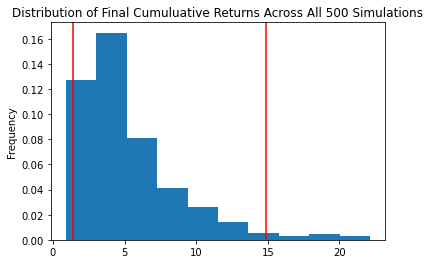

In [272]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

weight_20_80_line_plot = MC_20_80_weight.plot_distribution()



In [273]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

weight_20_80_table = MC_20_80_weight.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics

weight_20_80_table



count           500.000000
mean              5.310733
std               3.538086
min               0.899145
25%               2.894172
50%               4.194046
75%               6.612578
max              22.141339
95% CI Lower      1.405724
95% CI Upper     14.899570
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [274]:
# Print the current balance of the stock and bond portion of the members portfolio

total_stocks_bonds


72658.3

In [275]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_ten_cumulative_return = round(weight_20_80_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(weight_20_80_table[9]*total_stocks_bonds,2)


# Print the result of your calculations

print(f"There is a 95% chance that the stock and bond portfolio will end up within the range of ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return} in ten years.")



There is a 95% chance that the stock and bond portfolio will end up within the range of $102137.49 and $1082577.46 in ten years.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?